<a href="https://colab.research.google.com/github/martin-ss/Semantic-Segmentation-COVID-19/blob/main/Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This program for COVID 19 segmentation of the infecious part as well as the left and the right lung
```



In [ ]:
# Get Tensorflow
!pip install tensorflow==2.2

In [ ]:



#import libiraries




import time
import cv2

import numpy as np
import skimage.draw
import random
import keras
import matplotlib.pyplot as plt
import matplotlib.colors
import scipy.io as sio

import scipy
import scipy.ndimage
import keras.backend as K
#import segmentation_models as sm
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# Name experiment
experiment_name = "exp-1"
from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose





from os.path import isfile, join
import keras

# Standard dependencies
import cv2
import time
import scipy as sp
import numpy as np

import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf
import keras

from keras import backend as K
from keras.activations import elu
from keras.optimizers import Adam
from keras.models import Sequential
from keras.engine import Layer, InputSpec
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D, Dropout
from sklearn.metrics import cohen_kappa_score
import json





In [ ]:
# mount my google drive files to get the data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#make my drive is the current directory
!cd /content/drive/My Drive

/bin/bash: line 0: cd: too many arguments


In [ ]:
#how many images and masks in the data
images_Path = '/content/drive/My Drive/datacovd19/tra!cd /content/drive/My Drivein/images'
masks_Path = '/content/drive/My Drive/datacovd19/train!cd /content/drive/My Drive/masks'

# List of files
#-------------------------------
images = os.listdir(images_Path)
masks = os.listdir(masks_Path)
#----------------------
print(len(images))
print(len(masks))


In [ ]:
#read the images and the mask and apply some prepreocessing
import os
import cv2 as cv
import numpy as np
da = []

#Y = np.zeros((len(masks),IMG_Height,IMG_Width,4),dtype=np.bool)
dim = (128, 128)
directory1 = '/content/drive/My Drive/datacovd19/train2/images'
i = 0
images = os.listdir(directory1)
print(len(images))
X = np.zeros((len(images),128,128,1),dtype=np.uint8)

directory2 = '/content/drive/My Drive/datacovd19/train2/masks'
masks = os.listdir(directory2)
print(len(masks))
Y = np.zeros((len(masks),128,128,4),dtype=np.bool)
class_values = [0,85,170,255]

for  filename in os.listdir(directory1):
    if filename.endswith("png"):
          image = cv2.imread(os.path.join(directory1, filename))
          mask = cv2.imread(os.path.join(directory2, filename))

          image = cv2.resize(image, dim)
          mask = cv2.resize(mask, dim)

          image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          image = cv2.normalize(image, None, 0, 255, cv.NORM_MINMAX)


          mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

          masks = [(mask == v) for v in class_values]
          mask = np.stack(masks, axis=-1).astype('float')
          #masks = cv2.normalize(masks, None, 0, 255, cv.NORM_MINMAX)

          X[i][:,:,0] = image
          Y[i][:,:,:] = mask
          print(i)
          i =i+1



In [ ]:
print(X.shape)
print(Y.shape)

(3520, 128, 128, 1)
(3520, 128, 128, 4)


In [ ]:
import tensorflow as tf

Y_full = tf.keras.utils.to_categorical(
    Y, num_classes=4, dtype='bool'
)


In [ ]:
def visualize(**images):
    """PLot images in one row."""

    norm=plt.Normalize(0,4) # 5 classes including BG
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue"])


    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap=map_name, norm=norm)
    plt.show()

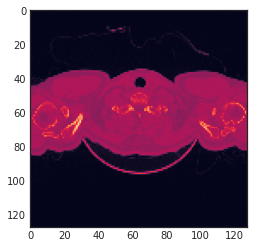

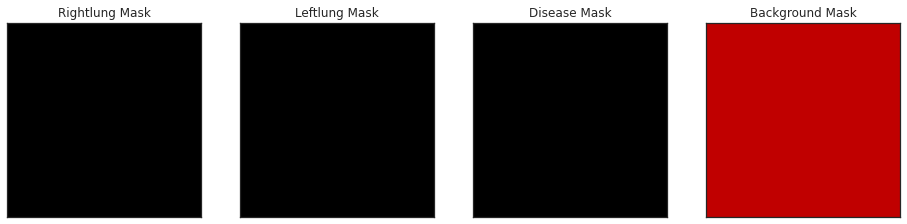

In [ ]:
from cv2 import imshow
from matplotlib.pyplot import imshow
plt.imshow(X[1500,:,:,0].squeeze())

visualize(
    #image=X[3000,:,:,0].squeeze(),
    RightLung_mask = Y[1500,..., 1].squeeze(),
    LeftLung_mask = Y[1500,..., 2].squeeze(),
    Disease_mask = Y[1500,..., 3].squeeze(),
    background_mask = Y[1500,..., 0].squeeze(),
)

In [ ]:
#split the data into train, test and validation
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(1579, 128, 128, 1)
(1579, 128, 128, 4)
(1162, 128, 128, 1)
(1162, 128, 128, 4)
(779, 128, 128, 1)
(779, 128, 128, 4)


In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def Dice_loss(y_true, y_pred):
    return  1.0 - Dice_coef(y_true, y_pred)

In [ ]:
#get the segmentation library
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-or9tltmv
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-or9tltmv
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp36-none-any.whl size=33792 sha256=761953c1d2b69e261649431d8322b1dc4c4e2c22eda6434792f2ecc3c8f704fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-wtepdav9/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [ ]:
#Model
import tensorflow as tf

from tensorflow.keras.applications import vgg16
import segmentation_models as sm

BACKBONE = 'inceptionresnetv2'
preprocess_input = sm.get_preprocessing(BACKBONE)

#x_train = preprocess_input(x_train)
#x_val = preprocess_input(x_val)
#input_shape=(128,128,3),
model = sm.Unet(BACKBONE,input_shape=(128,128,1),classes=4,encoder_weights=None)
#model.load_weights('/content/drive/My Drive/datacovd19/logs/weights2.h5')
model.compile(
    'Adam',
    loss=sm.losses.CategoricalCELoss(class_weights=None, class_indexes=None),
    metrics=[sm.metrics.iou_score,sm.metrics.FScore(beta=1, class_weights=None, class_indexes=None, threshold=None, per_image=False, smooth=1e-05, name=None)],
)
#sm.metrics.iou_score,
checkpoint_filepath = '/content/drive/My Drive/datacovd19/logs/model.h5'

model_checkpoint = ModelCheckpoint('/content/drive/My Drive/datacovd19/logs/model3.h5',
                                   monitor='val_Jaccard_coef',
                                   verbose=1,
                                   mode='max',
                                   save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_Jaccard_coef',
                              factor=0.5,
                              patience=8,
                              verbose=1,
                              mode='max',
                              min_lr=0.00000001)

early_stopping = EarlyStopping(monitor='val_Jaccard_coef',
                               patience=5,
                               verbose=1,
                               mode='max',
                               restore_best_weights=True)



Segmentation Models: using `keras` framework.


In [ ]:
start_time = time.time()
model.fit(
   x=x_train,
   y=y_train,
   batch_size=16,
   epochs=10,
   callbacks=[model_checkpoint,reduce_lr,early_stopping],
   validation_data=(x_val, y_val),
)
end_time = time.time()
print("--- Time taken to train : %s hours ---" % ((end_time - start_time)//3600))
model.save('/content/drive/My Drive/datacovd19/logs/model3.h5')

Train on 1579 samples, validate on 779 samples
Epoch 1/10
1579/1579 [==============================] - 1159s 734ms/step - loss: 0.1106 - iou_score: 0.2797 - f1-score: 0.3620 - val_loss: 0.1630 - val_iou_score: 0.2351 - val_f1-score: 0.3100
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_Jaccard_coef available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_Jaccard_coef` which is not available. Available metrics are: val_loss,val_iou_score,val_f1-score,loss,iou_score,f1-score,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_Jaccard_coef` which is not available. Available metrics are: val_loss,val_iou_score,val_f1-score,loss,iou_score,f1-score,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1579/1579 [==============================] - 1144s 724ms/step - loss: 0.0209 - iou_score: 0.3940 - f1-score: 0.5004 - val_loss: 0.3209 - val_iou_score: 0.2326 - val_f1-score: 0.3084
Epoch 3/10
1579/1579 [==============================] - 1143s 724ms/step - loss: 0.0150 - iou_score: 0.4253 - f1-score: 0.5350 - val_loss: 0.0712 - val_iou_score: 0.3611 - val_f1-score: 0.4717
Epoch 4/10
1579/1579 [==============================] - 1135s 719ms/step - loss: 0.0116 - iou_score: 0.4457 - f1-score: 0.5608 - val_loss: 0.0197 - val_iou_score: 0.4877 - val_f1-score: 0.5936
Epoch 5/10
1579/1579 [==============================] - 1118s 708ms/step - loss: 0.0101 - iou_score: 0.4534 - f1-score: 0.5699 - val_loss: 0.1252 - val_iou_score: 0.2361 - val_f1-score: 0.2718
Epoch 6/10
1579/1579 [==============================] - 1158s 734ms/step - loss: 0.0096 - iou_score: 0.4488 - f1-score: 0.5657 - val_loss: 0.0245 - val_iou_score: 0.4287 - val_f1-score: 0.5427
Epoch 7/10
1579/1579 [========================

In [ ]:

model.save_weights('/content/drive/My Drive/datacovd19/logs/weights3.h5')



In [ ]:
plt.plot(model.history['iou_score'])
plt.plot(model.history['val_iou_score'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
from keras import backend as K

def swish_activation(x):
        return (K.sigmoid(x) * x)

get_custom_objects().update({'swish_activation': Activation(swish_activation)})

In [ ]:
from keras.models import load_model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/datacovd19/logs/model3.h5',compile=False)

In [ ]:
model.compile(
    'Adam',
    loss=sm.losses.CategoricalCELoss(class_weights=None, class_indexes=None),
    metrics=[sm.metrics.iou_score,sm.metrics.FScore(beta=1, class_weights=None, class_indexes=None, threshold=None, per_image=False, smooth=1e-05, name=None)],
)
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_val, y_val, batch_size=128)
print('test loss, test acc:', results)




# Evaluate on test data
7/7 [==============================] - 75s 11s/step - loss: 0.0090 - iou_score: 0.4356 - f1-score: 0.5429
test loss, test acc: [0.008984952233731747, 0.435558557510376, 0.5428872108459473]


In [ ]:
print(model.metrics_names)

['loss', 'iou_score', 'f1-score']


In [ ]:
print('\n# Generate predictions for All samples')
predictions = model.predict(x_train)
print('predictions shape:', predictions.shape)


# Generate predictions for All samples
predictions shape: (1579, 128, 128, 4)


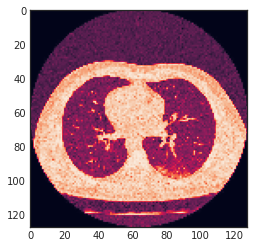

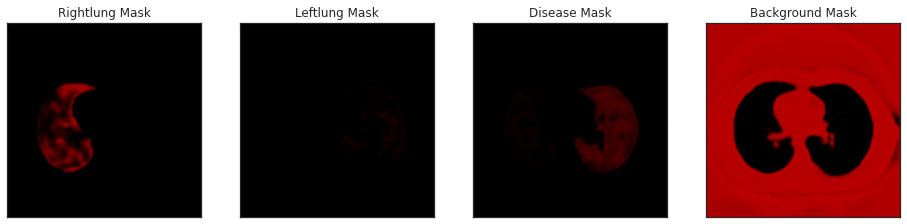

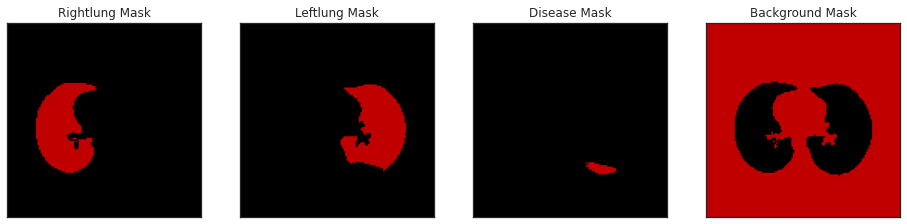

In [ ]:
plt.imshow(x_train[500,:,:].squeeze())
visualize(
    #image=x_train[500,:,:].squeeze(),
    RightLung_mask = predictions[500,..., 1].squeeze(),
    LeftLung_mask = predictions[500,..., 2].squeeze(),
    Disease_mask = predictions[500,..., 3].squeeze(),
    background_mask = predictions[500,..., 0].squeeze(),
)
visualize(
    #image=X[3000,:,:,0].squeeze(),
    RightLung_mask = y_train[500,..., 1].squeeze(),
    LeftLung_mask = y_train[500,..., 2].squeeze(),
    Disease_mask = y_train[500,..., 3].squeeze(),
    background_mask = y_train[500,..., 0].squeeze(),
)

In [ ]:
# get some performance values between our predictions and gt
from sklearn.metrics import confusion_matrix
def Performance_Metrics(y_true, y_pred):

    if y_true.shape != y_pred.shape:
        raise ValueError("Shape mismatch!! y_true and y_pred must have the same shape.")

    y_true_f = (y_true/y_true.max()).flatten()
    y_pred_f = (y_pred/y_pred.max()).flatten()

    intersection = np.sum(y_true_f * y_pred_f)

    dsc = (2. * intersection ) / (np.sum(y_true_f) + np.sum(y_pred_f))
    iou = (intersection) / (np.sum(y_true_f) + np.sum(y_pred_f)-intersection)

    y_true = np.asarray(y_true).astype(np.bool)
    y_pred = np.asarray(y_pred).astype(np.bool)


    y_true=y_true.flatten()
    y_pred=y_pred.flatten()

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    sensitivity = (tp)/(fn+tp)
    specificity = (tn)/(tn+fp)
    balancedAccuracy = (sensitivity+specificity)/2


    return dsc, iou, accuracy, sensitivity, specificity, balancedAccuracy

In [ ]:
Performance_Metrics(y_train,predictions)

(0.9236004385700519, 0.8580460933513301, 0.245446135682196, 1.0, 0.0, 0.5)

In [ ]:
from sklearn.metrics import accuracy_score
ff =y_test[50,:,:,3]
gg = predictions[50,:,:,3]
accuracy_score(ff, gg)

In [ ]:
from sklearn.metrics import roc_auc_score
print(y_test[:,:,:,0].shape, predictions.shape)
for i in range(0,1161):
  try :
    roc_auc_score(y_test[i,:,:,0], predictions[i,:,:,0])
  except ValueError:
    pass



(1162, 128, 128) (1162, 128, 128, 4)


In [ ]:
#model.load_weights('{}/{}.h5'.format('/content/drive/My Drive/datacovd19','exp-1'))

In [ ]:
def pvalue_101(mu, sigma, samp_size, samp_mean=0, deltam=0):
    np.random.seed(1234)
    s1 = np.random.normal(mu, sigma, samp_size)
    if samp_mean > 0:
        print(len(s1[s1>samp_mean]))
        outliers = float(len(s1[s1>samp_mean])*100)/float(len(s1))
        print('Percentage of numbers larger than {} is {}%'.format(samp_mean, outliers))
    if deltam == 0:
        deltam = abs(mu-samp_mean)
    if deltam > 0 :
        outliers = (float(len(s1[s1>(mu+deltam)]))
                    +float(len(s1[s1<(mu-deltam)])))*100.0/float(len(s1))
        print('Percentage of numbers further than the population mean of {} by +/-{} is {}%'.format(mu, deltam, outliers))

    fig, ax = plt.subplots(figsize=(8,8))
    fig.suptitle('Normal Distribution: population_mean={}'.format(mu) )
    plt.hist(s1)
    plt.axvline(x=mu+deltam, color='red')
    plt.axvline(x=mu-deltam, color='green')
    plt.show()

In [ ]:
from scipy import stats
rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
print(stats.ttest_ind(rvs1,rvs2))

In [ ]:
# predict the output from X_test --> predicted mask
# evaluation : evaluate the difference between the predicted mask and the ground-truth mask
# dife coef, ROC, FRO, etc...

In [ ]:
from scipy.stats import pearsonr
for i in range(0,1161):
  pearson_Value = pearsonr(y_test[i,:,:,0],predictions[i,:,:,0])
  print(pearson_Value)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

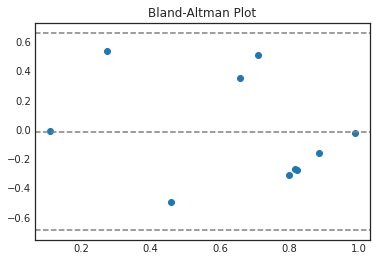

In [ ]:
from numpy.random import random

bland_altman_plot(random(10), random(10))
plt.title('Bland-Altman Plot')
plt.show()

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = # ground truth labels
y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [ ]:
import numpy as np
>>> from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)

In [ ]:
pwd

In [ ]:
'''We were about to use this model as a future development'''





#import tensorflow as tf
#from keras.layers import Input
#from tensorflow import keras
#from tf.k

from tensorflow.keras.layers import Input
#from tensorflow.keras.engine import Layer
def unet_ori(input_shape=(None, None, 3),dropout_rate=0.1):
  input = Input((512,512,3))
  x=input

  C1= tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
  print(C1.shape)

  C2= tf.keras.layers.Conv2D(64, 3, activation='relu')(C1)
  print(C2.shape)

  Pool1=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid')(C2)
  print(Pool1.shape)

  P_C1=tf.keras.layers.Conv2D(128,3,activation='relu')(Pool1)
  print(P_C1.shape)

  P_C2=tf.keras.layers.Conv2D(128,3,activation='relu')(P_C1)
  print(P_C2.shape)

  P2=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid')(P_C2)
  print(P2.shape)

  P2_C1=tf.keras.layers.Conv2D(256,3,activation='relu')(P2)
  print(P2_C1.shape)

  P2_C2=tf.keras.layers.Conv2D(256,3,activation='relu')(P2_C1)
  print(P2_C2.shape)

  P3=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid')(P2_C2)
  print(P3.shape)

  P3_C1=tf.keras.layers.Conv2D(512,3,activation='relu')(P3)
  print(P3_C1.shape)

  P3_C2=tf.keras.layers.Conv2D(512,3,activation='relu')(P3_C1)
  print(P3_C2.shape)

  P4=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid')(P3_C2)
  print(P4.shape)

  P4_C1=tf.keras.layers.Conv2D(1024,3, activation='relu')(P4)
  print(P4_C1.shape)

  P4_C2=tf.keras.layers.Conv2D(1024,3, activation='relu')(P4_C1)
  print(P4_C2.shape)

  Up_1 = tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (P4_C2)
  print(Up_1.shape)

  ch, cw = get_crop_shape(P3_C2, Up_1)

  ch, cw = get_crop_shape(P3_C2, Up_1)
  crop_P3_C2 = tf.keras.layers.Cropping2D(cropping=(ch,cw))(P3_C2)
  print(crop_P3_C2.shape)

  ConCat1=tf.keras.layers.Concatenate()([Up_1,crop_P3_C2])
  print(ConCat1.shape)

  Up1_C1=tf.keras.layers.Conv2D(512,3,activation='relu')(ConCat1)
  print(Up1_C1.shape)

  Up1_C2=tf.keras.layers.Conv2D(512,3,activation='relu')(Up1_C1)
  print(Up1_C2.shape)

  up_2=tf.keras.layers.Conv2DTranspose(256,(2,2),strides=(2,2),padding='same')(Up1_C2)
  print(up_2.shape)

  ch, cw = get_crop_shape(P2_C2, up_2)
  crop_P2_C2 = tf.keras.layers.Cropping2D(cropping=(ch,cw))(P2_C2)
  print(crop_P2_C2.shape)

  ConCat2=tf.keras.layers.Concatenate()([up_2,crop_P2_C2])
  print(ConCat2.shape)

  Up2_c1=tf.keras.layers.Conv2D(256,3, activation='relu')(ConCat2)
  print(Up2_c1.shape)

  Up2_c2=tf.keras.layers.Conv2D(256,3, activation='relu')(Up2_c1)
  print(Up2_c2.shape)

  up_3=tf.keras.layers.Conv2DTranspose(128,kernel_size=(2,2),strides=(2,2),padding='same')(Up2_c2)
  print(up_3.shape)

  ch, cw = get_crop_shape(P_C2, up_3)
  crop_P_C2 = tf.keras.layers.Cropping2D(cropping=(ch,cw))(P_C2)
  print(crop_P_C2.shape)

  ConCat3=tf.keras.layers.Concatenate()([up_3,crop_P_C2])
  print(ConCat3.shape)

  Up3_c1=tf.keras.layers.Conv2D(128,3,activation='relu')(ConCat3)
  print(Up3_c1.shape)

  Up3_c2=tf.keras.layers.Conv2D(128,3, activation='relu')(Up3_c1)
  print(Up3_c2.shape)

  up_4=tf.keras.layers.Conv2DTranspose(64,kernel_size=(2,2),strides=(2,2),padding='same')(Up3_c2)
  print(up_4.shape)

  ch, cw = get_crop_shape(C2, up_4)
  crop_C2 = tf.keras.layers.Cropping2D(cropping=(ch,cw))(C2)
  print(crop_C2.shape)

  ConCat4=tf.keras.layers.Concatenate()([crop_C2,up_4])
  print(ConCat4.shape)

  Up4_c1=tf.keras.layers.Conv2D(64,3,activation='relu')(ConCat4)
  print(Up4_c1.shape)

  Up4_c2=tf.keras.layers.Conv2D(64,3,activation='relu')(Up4_c1)
  print(Up4_c2.shape)

  c_1x1=tf.keras.layers.Conv2D(1,1,activation='softmax',padding='same')(Up4_c2)
  print(c_1x1.shape)

  model = tf.keras.models.Model(input, c_1x1)
  #model.name = 'u-Efficients'
  #model = Model(inputs=[inputs], outputs=[outputs])
  model.compile(optimizer='adam', loss=Dice_loss, metrics=[dice_coef])

  return model

K.clear_session()
img_size = 256
model = unet_ori(input_shape=(512,512,3),dropout_rate=0.5)
#model = unet_ori(input_shape=(img_size,256,3),dropout_rate=0.5)
model.summary()